# Data Extracting and Preprocessing

In [45]:
import pandas as pd
import requests
from pandas import json_normalize  # To handle nested data

# URLs
quiz_url = "https://www.jsonkeeper.com/b/LLQT"
submission_url = "https://api.jsonserve.com/rJvd7g"
historical_url = "https://api.jsonserve.com/XgAgFJ"

# Fetching data from URLs
quiz_data = requests.get(quiz_url).json()
historical_data = requests.get(historical_url).json()
submission_data = requests.get(submission_url).json()

# Flattening Data
quiz_df = pd.json_normalize(quiz_data)
historical_df = pd.json_normalize(historical_data)
submission_df = pd.json_normalize(submission_data)

# Display DataFrames in Console
print("Quiz Data (Flattened):")
print(quiz_df.head(), "\n")

print("Historical Data (Flattened):")
print(historical_df.head(), "\n")

print("Submission Data (Flattened):")
print(submission_df.head(), "\n")

Quiz Data (Flattened):
   quiz.id quiz.name                                         quiz.title  \
0       43      None  Structural Organisation in Animals and Plants (7)   

  quiz.description quiz.difficulty_level                          quiz.topic  \
0                                   None  Structural Organisation in Animals   

                       quiz.time  quiz.is_published  \
0  2024-07-03T00:00:00.000+05:30               True   

                 quiz.created_at                quiz.updated_at  ...  \
0  2024-07-03T11:00:08.958+05:30  2024-09-23T18:43:27.751+05:30  ...   

   quiz.exam_id quiz.show_unanswered quiz.ends_at quiz.lives  quiz.live_count  \
0          None                False   2025-01-18       None        Free Test   

   quiz.coin_count  quiz.questions_count   quiz.daily_date  \
0               -1                   128  January 17, 2025   

   quiz.max_mistake_count                                     quiz.questions  
0                      15  [{'id': 1827, '

In [46]:
quiz_df.head()

,quiz.id,quiz.name,quiz.title,quiz.description,quiz.difficulty_level,quiz.topic,quiz.time,quiz.is_published,quiz.created_at,quiz.updated_at,...,quiz.exam_id,quiz.show_unanswered,quiz.ends_at,quiz.lives,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.questions
0,43,None,Structural Organisation in Animals and Plants (7),,None,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03T11:00:08.958+05:30,2024-09-23T18:43:27.751+05:30,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,"[{'id': 1827, 'description': 'The tissue which..."


In [47]:
#Drop null value columns
quiz_df = quiz_df.dropna(axis=1)
quiz_df

,quiz.id,quiz.title,quiz.description,quiz.topic,quiz.time,quiz.is_published,quiz.created_at,quiz.updated_at,quiz.duration,quiz.end_time,...,quiz.show_mastery_option,quiz.is_custom,quiz.show_unanswered,quiz.ends_at,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.questions
0,43,Structural Organisation in Animals and Plants (7),,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03T11:00:08.958+05:30,2024-09-23T18:43:27.751+05:30,128,2024-07-04T00:00:00.000+05:30,...,False,False,False,2025-01-18,Free Test,-1,128,"January 17, 2025",15,"[{'id': 1827, 'description': 'The tissue which..."


In [48]:
columns_to_drop = ['quiz.description','quiz.time','quiz.is_published','quiz.created_at','quiz.updated_at',
            'quiz.end_time','quiz.shuffle', 'quiz.lock_solutions','quiz.is_form',
            'quiz.show_mastery_option','quiz.is_custom','quiz.live_count','quiz.coin_count',
             'quiz.daily_date']

quiz_df = quiz_df.drop(columns=columns_to_drop)
quiz_df

,quiz.id,quiz.title,quiz.topic,quiz.duration,quiz.negative_marks,quiz.correct_answer_marks,quiz.show_answers,quiz.show_unanswered,quiz.ends_at,quiz.questions_count,quiz.max_mistake_count,quiz.questions
0,43,Structural Organisation in Animals and Plants (7),Structural Organisation in Animals,128,1.0,4.0,True,False,2025-01-18,128,15,"[{'id': 1827, 'description': 'The tissue which..."


In [49]:
quiz_df.columns

Index(['quiz.id', 'quiz.title', 'quiz.topic', 'quiz.duration',
       'quiz.negative_marks', 'quiz.correct_answer_marks', 'quiz.show_answers',
       'quiz.show_unanswered', 'quiz.ends_at', 'quiz.questions_count',
       'quiz.max_mistake_count', 'quiz.questions'],
      dtype='object')

In [50]:
submission_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz.exam_id,quiz.show_unanswered,quiz.ends_at,quiz.lives,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.reading_materials
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,[]


In [51]:
historical_df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,response_map.3194,response_map.2417,response_map.2425,response_map.2435,response_map.2440,response_map.2444,response_map.2452,response_map.2459,response_map.2469,response_map.2515
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
historical_df.isnull().sum()

id                    0
quiz_id               0
user_id               0
submitted_at          0
created_at            0
                     ..
response_map.2444    13
response_map.2452    13
response_map.2459    13
response_map.2469    13
response_map.2515    13
Length: 287, dtype: int64

In [53]:
historical_df.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed',
       ...
       'response_map.3194', 'response_map.2417', 'response_map.2425',
       'response_map.2435', 'response_map.2440', 'response_map.2444',
       'response_map.2452', 'response_map.2459', 'response_map.2469',
       'response_map.2515'],
      dtype='object', length=287)

In [54]:
historical_columns_to_remove = ['submitted_at', 'created_at', 'updated_at',
       'type', 'started_at', 'ended_at',
        'quiz.name', 'quiz.description',
       'quiz.difficulty_level', 'quiz.is_published',
       'quiz.created_at', 'quiz.updated_at', 'quiz.end_time',
      'quiz.shuffle',
       'quiz.show_answers', 'quiz.lock_solutions', 'quiz.is_form',
       'quiz.show_mastery_option', 'quiz.reading_material', 'quiz.quiz_type',
       'quiz.is_custom', 'quiz.banner_id', 'quiz.exam_id',
       'quiz.show_unanswered', 'quiz.ends_at', 'quiz.lives', 'quiz.live_count',
       'quiz.coin_count', 'quiz.daily_date',
       'quiz.reading_materials']

historical_df = historical_df.drop(columns=historical_columns_to_remove)

historical_df

,id,quiz_id,user_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,...,response_map.3194,response_map.2417,response_map.2425,response_map.2435,response_map.2440,response_map.2444,response_map.2452,response_map.2459,response_map.2469,response_map.2515
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,2,90 %,100,105.0,3.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,1,100 %,100,92.0,0.0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,2,96 %,100,115.0,1.0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,2,90 %,100,35.0,1.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,31 %,96,16.0,20.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,40,3,38 %,86,24.0,16.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,50 %,78,27.0,9.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,12,2,30 %,100,5.0,7.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,76,2,100 %,95,76.0,0.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,40,1,100 %,100,40.0,0.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Convert to appropriate data types
historical_df['quiz.time'] = pd.to_datetime(historical_df['quiz.time'], errors='coerce')  # Convert to datetime
#historical_df['duration'] = pd.to_timedelta(historical_df['duration'], errors='coerce')  # Convert to timedelta

# Remove '%' symbol and convert to numeric values
historical_df['accuracy'] = historical_df['accuracy'].str.replace('%', '', regex=True).astype(float) / 100

# Convert numeric-like object columns
numeric_columns = ['accuracy', 'speed', 'final_score', 'negative_score', 'quiz.negative_marks', 'quiz.correct_answer_marks']
for col in numeric_columns:
    historical_df[col] = pd.to_numeric(historical_df[col], errors='coerce')  # Convert to float/int

# Convert categorical columns
categorical_columns = ['user_id', 'source', 'quiz.title', 'quiz.topic', 'rank_text']
for col in categorical_columns:
    historical_df[col] = historical_df[col].astype('category')

# Check the updated data types
print(historical_df.dtypes)

id                      int64
quiz_id                 int64
user_id              category
score                   int64
trophy_level            int64
                       ...   
response_map.2444     float64
response_map.2452     float64
response_map.2459     float64
response_map.2469     float64
response_map.2515     float64
Length: 257, dtype: object


In [56]:
# Display the specified columns
columns_to_display = ['quiz.time','duration','accuracy', 'speed', 'final_score', 'negative_score', 'quiz.negative_marks', 'quiz.correct_answer_marks',
                      'user_id', 'source', 'quiz.title', 'quiz.topic', 'rank_text',]
print(historical_df[columns_to_display])

                   quiz.time duration  accuracy  speed  final_score  \
0  2024-07-12 00:00:00+05:30    15:00      0.90    100        105.0   
1  2024-04-25 00:00:00+05:30    15:00      1.00    100         92.0   
2  2024-07-12 00:00:00+05:30    15:00      0.96    100        115.0   
3  2024-04-25 00:00:00+05:30    15:00      0.90    100         35.0   
4  2024-07-12 00:00:00+05:30    15:00      0.31     96         16.0   
5  2024-07-12 00:00:00+05:30    15:00      0.38     86         24.0   
6  2024-04-25 00:00:00+05:30    15:00      0.50     78         27.0   
7  2024-06-07 00:00:00+05:30    15:00      0.30    100          5.0   
8  2024-06-10 00:00:00+05:30    15:00      1.00     95         76.0   
9  2024-06-07 00:00:00+05:30    15:00      1.00    100         40.0   
10 2024-06-10 00:00:00+05:30    15:00      0.93    100        110.0   
11 2024-06-07 00:00:00+05:30    15:00      0.84     86         61.0   
12 2024-07-12 00:00:00+05:30    15:00      0.43    100         35.0   
13 202

In [57]:
# Identify object-type columns
object_columns = historical_df.select_dtypes(include=['object']).columns
print("Object-Type Columns:\n", object_columns)

Object-Type Columns:
 Index(['duration'], dtype='object')


In [59]:
historical_df = historical_df.drop('duration', axis=1)


In [60]:
import re
#To extract just the ranks
historical_df['rank'] = historical_df['rank_text'].apply(lambda x: abs(int(re.search(r'(?<=#)(-?\d+)', x).group(0))) if re.search(r'(?<=#)(-?\d+)', x) else None)

# Drop the original 'rank_text' column
historical_df.drop('rank_text', axis=1, inplace=True)

# Display the updated DataFrame
print(historical_df)

        id  quiz_id                       user_id  score  trophy_level  \
0   336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42    108             2   
1   336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42     92             1   
2   333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42    116             2   
3   333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42     36             2   
4   329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42     36             3   
5   328488       57  YcDFSO4ZukTJnnFMgRNVwZTE4j42     40             3   
6   328414        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42     36             3   
7   321514       20  YcDFSO4ZukTJnnFMgRNVwZTE4j42     12             2   
8   320963       24  YcDFSO4ZukTJnnFMgRNVwZTE4j42     76             2   
9   320916       18  YcDFSO4ZukTJnnFMgRNVwZTE4j42     40             1   
10  315179       25  YcDFSO4ZukTJnnFMgRNVwZTE4j42    112             2   
11  315081       18  YcDFSO4ZukTJnnFMgRNVwZTE4j42     64             3   
12  257774       58  YcDFSO4ZukTJnnFMg

In [61]:
historical_df['quiz.time']

0    2024-07-12 00:00:00+05:30
1    2024-04-25 00:00:00+05:30
2    2024-07-12 00:00:00+05:30
3    2024-04-25 00:00:00+05:30
4    2024-07-12 00:00:00+05:30
5    2024-07-12 00:00:00+05:30
6    2024-04-25 00:00:00+05:30
7    2024-06-07 00:00:00+05:30
8    2024-06-10 00:00:00+05:30
9    2024-06-07 00:00:00+05:30
10   2024-06-10 00:00:00+05:30
11   2024-06-07 00:00:00+05:30
12   2024-07-12 00:00:00+05:30
13   2024-07-11 00:00:00+05:30
Name: quiz.time, dtype: datetime64[ns, UTC+05:30]

In [62]:
# Convert the 'quiz.time' column to datetime (if it's not already in datetime format)
historical_df['quiz.time'] = pd.to_datetime(historical_df['quiz.time'])

# Extract only the date part
historical_df['quiz.time'] = historical_df['quiz.time'].dt.date

# Display the updated DataFrame
print(historical_df['quiz.time'])


0     2024-07-12
1     2024-04-25
2     2024-07-12
3     2024-04-25
4     2024-07-12
5     2024-07-12
6     2024-04-25
7     2024-06-07
8     2024-06-10
9     2024-06-07
10    2024-06-10
11    2024-06-07
12    2024-07-12
13    2024-07-11
Name: quiz.time, dtype: object


In [63]:
historical_df['quiz.title']

0                           Human Physiology (15)
1                            Human Physiology PYQ
2                           Human Physiology (15)
3                            Human Physiology PYQ
4                           Human Physiology (15)
5                                    Reproduction
6                            Human Physiology PYQ
7     PRINCIPLES OF INHERITANCE AND VARIATION PYQ
8                  MICROBES IN HUMAN WELFARE  PYQ
9                         REPRODUCTIVE HEALTH PYQ
10                   HUMAN HEALTH AND DISEASE PYQ
11                        REPRODUCTIVE HEALTH PYQ
12                                   Reproduction
13                          Human Physiology (14)
Name: quiz.title, dtype: category
Categories (8, object): ['HUMAN HEALTH AND DISEASE PYQ', 'Human Physiology (14)', 'Human Physiology (15)', 'Human Physiology PYQ', 'MICROBES IN HUMAN WELFARE  PYQ', 'PRINCIPLES OF INHERITANCE AND VARIATION PYQ', 'REPRODUCTIVE HEALTH PYQ', 'Reproduction']

In [64]:
# Function to clean titles
def clean_title(title):
    # Remove numbers in parentheses and the term 'PYQ'
    title = re.sub(r'\(\d+\)', '', title)  # Remove numbers in parentheses
    title = re.sub(r'PYQ', '', title)  # Remove 'PYQ'
    
    # Convert to CamelCase
    title = ''.join([word.capitalize() for word in title.split() if word])  # Capitalize and join

    return title

# Apply the cleaning function to the 'quiz.title' column
historical_df['quiz.title'] = historical_df['quiz.title'].apply(clean_title)

In [19]:
historical_df['quiz.title']

0                         HumanPhysiology
1                         HumanPhysiology
2                         HumanPhysiology
3                         HumanPhysiology
4                         HumanPhysiology
5                            Reproduction
6                         HumanPhysiology
7     PrinciplesOfInheritanceAndVariation
8                  MicrobesInHumanWelfare
9                      ReproductiveHealth
10                  HumanHealthAndDisease
11                     ReproductiveHealth
12                           Reproduction
13                        HumanPhysiology
Name: quiz.title, dtype: object

In [65]:
historical_df.head()

,id,quiz_id,user_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,...,response_map.2417,response_map.2425,response_map.2435,response_map.2440,response_map.2444,response_map.2452,response_map.2459,response_map.2469,response_map.2515,rank
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,2,0.90,100,105.0,3.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,1,1.00,100,92.0,0.0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9140
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,2,0.96,100,115.0,1.0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,2,0.90,100,35.0,1.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1598
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,0.31,96,16.0,20.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [21]:
# Display the specified columns
columns_to_display = ['quiz.time','accuracy', 'speed', 'final_score', 'negative_score', 'quiz.negative_marks', 'quiz.correct_answer_marks',
                      'user_id', 'source', 'quiz.title', 'quiz.topic', 'rank',]
print(historical_df[columns_to_display])

     quiz.time  accuracy  speed  final_score  negative_score  \
0   2024-07-12      0.90    100        105.0             3.0   
1   2024-04-25      1.00    100         92.0             0.0   
2   2024-07-12      0.96    100        115.0             1.0   
3   2024-04-25      0.90    100         35.0             1.0   
4   2024-07-12      0.31     96         16.0            20.0   
5   2024-07-12      0.38     86         24.0            16.0   
6   2024-04-25      0.50     78         27.0             9.0   
7   2024-06-07      0.30    100          5.0             7.0   
8   2024-06-10      1.00     95         76.0             0.0   
9   2024-06-07      1.00    100         40.0             0.0   
10  2024-06-10      0.93    100        110.0             2.0   
11  2024-06-07      0.84     86         61.0             3.0   
12  2024-07-12      0.43    100         35.0            17.0   
13  2024-07-11      0.66     90         21.0             3.0   

    quiz.negative_marks  quiz.correct_a

In [66]:
#Export to csv
historical_df.to_csv("historical_data.csv", index=False)

# Task 1 Performance by topics and accuracy

C:\Users\User\AppData\Local\Temp\ipykernel_14332\2885583755.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_performance = historical_df.groupby('quiz.topic').agg({
C:\Users\User\AppData\Local\Temp\ipykernel_14332\2885583755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='quiz.topic', data=topic_performance_sorted, ax=axes[0], palette='Blues_d')
C:\Users\User\AppData\Local\Temp\ipykernel_14332\2885583755.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='

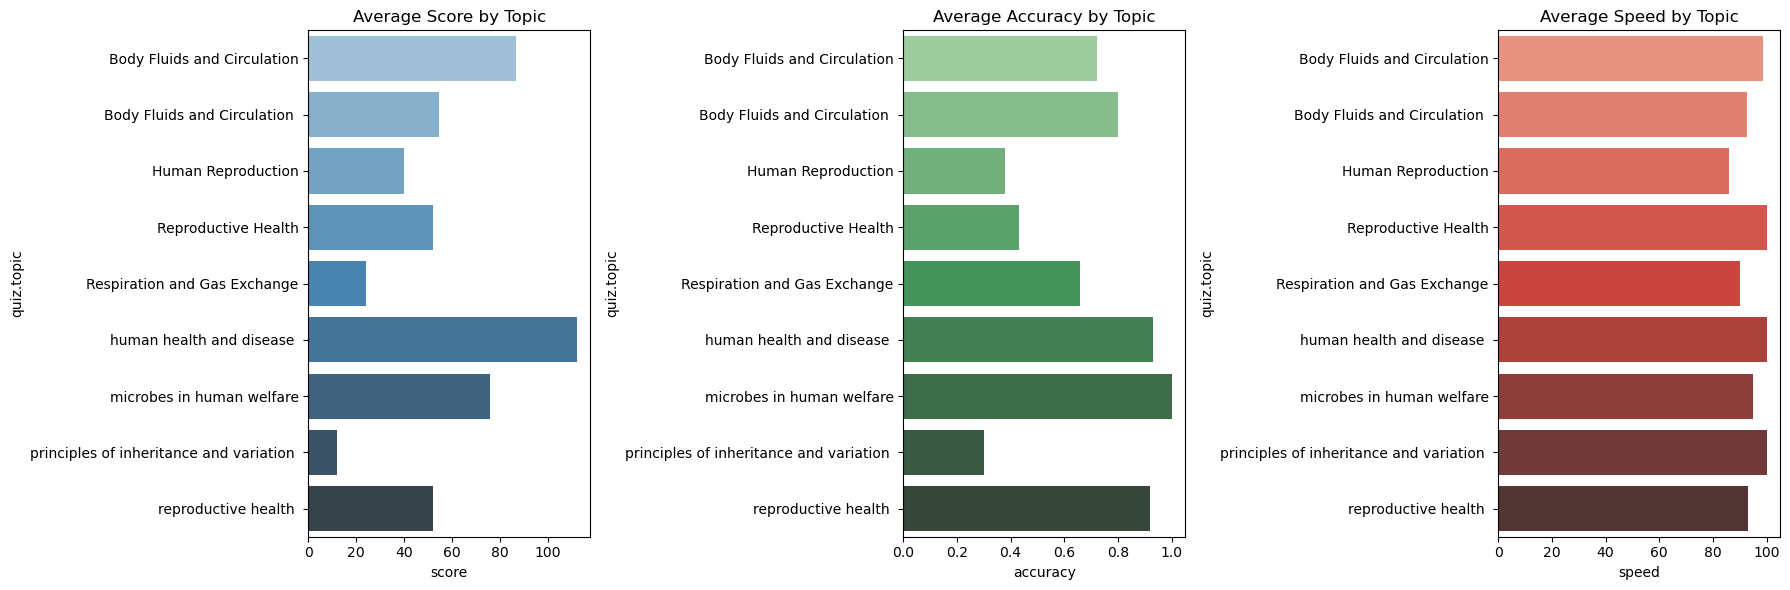

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by topic
topic_performance = historical_df.groupby('quiz.topic').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'speed': 'mean',
    'final_score': 'mean',
    'total_questions': 'mean'
}).reset_index()

# Sort by accuracy to identify topics with the highest and lowest accuracy
topic_performance_sorted = topic_performance.sort_values(by='accuracy', ascending=False)

# Plotting the performance by topics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Score vs Topic
sns.barplot(x='score', y='quiz.topic', data=topic_performance_sorted, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Score by Topic')

# Accuracy vs Topic
sns.barplot(x='accuracy', y='quiz.topic', data=topic_performance_sorted, ax=axes[1], palette='Greens_d')
axes[1].set_title('Average Accuracy by Topic')

# Speed vs Topic
sns.barplot(x='speed', y='quiz.topic', data=topic_performance_sorted, ax=axes[2], palette='Reds_d')
axes[2].set_title('Average Speed by Topic')

plt.tight_layout()
plt.show()

# Displaying the top and bottom 5 topics based on accuracy
# print("Top 5 Topics with Highest Accuracy:")
# print(topic_performance_sorted.head())

# print("Bottom 5 Topics with Lowest Accuracy:")
# print(topic_performance_sorted.tail())


C:\Users\User\AppData\Local\Temp\ipykernel_14332\672059257.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens' if color_low == 'green' else 'Reds')  # Green for high accuracy, Red for low accuracy


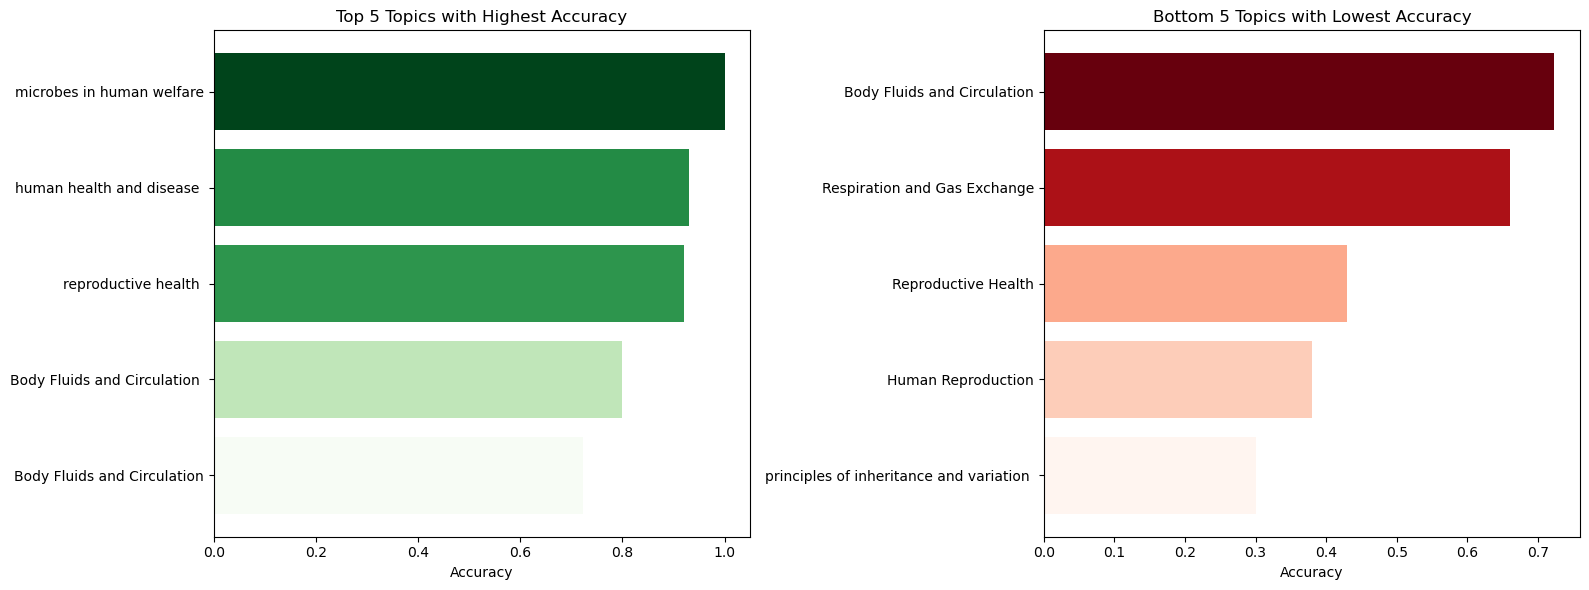

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create a gradient color from dark to light
def get_color_gradient(data, color_low, color_high):
    norm = plt.Normalize(min(data), max(data))  # Normalize the data for color scale
    cmap = plt.cm.get_cmap('Greens' if color_low == 'green' else 'Reds')  # Green for high accuracy, Red for low accuracy
    return [cmap(norm(value)) for value in data]

# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Displaying the top and bottom 5 topics based on accuracy
top_5_df = topic_performance_sorted.head(5)
bottom_5_df = topic_performance_sorted.tail(5)

# Get gradient colors for top and bottom accuracy topics
top_5_colors = get_color_gradient(top_5_df['accuracy'], 'green', 'green')
bottom_5_colors = get_color_gradient(bottom_5_df['accuracy'], 'red', 'red')

# Plotting for Top 5 Topics with Highest Accuracy on the left
ax1.barh(top_5_df['quiz.topic'], top_5_df['accuracy'], color=top_5_colors)
ax1.set_xlabel('Accuracy')
ax1.set_title('Top 5 Topics with Highest Accuracy')
ax1.invert_yaxis()  # To display the highest at the top

# Plotting for Bottom 5 Topics with Lowest Accuracy on the right
ax2.barh(bottom_5_df['quiz.topic'], bottom_5_df['accuracy'], color=bottom_5_colors)
ax2.set_xlabel('Accuracy')
ax2.set_title('Bottom 5 Topics with Lowest Accuracy')
ax2.invert_yaxis()  # To display the lowest at the top

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Task 2 Highlighting weak areas, trend and gaps

In [25]:
# Identify weak areas (topics with accuracy < 60%)
weak_areas = historical_df[historical_df['accuracy'] < 0.6]

# Display weak areas (topics with low accuracy)
weak_areas[['quiz.title','quiz.topic', 'accuracy', 'score', 'total_questions']]

,quiz.title,quiz.topic,accuracy,score,total_questions
4,HumanPhysiology,Body Fluids and Circulation,0.31,36,100
5,Reproduction,Human Reproduction,0.38,40,89
6,HumanPhysiology,Body Fluids and Circulation,0.50,36,23
7,PrinciplesOfInheritanceAndVariation,principles of inheritance and variation,0.30,12,59
12,Reproduction,Reproductive Health,0.43,52,55


In [26]:
# Compute average accuracy for each topic
avg_topic_accuracy = historical_df.groupby('quiz.topic')['accuracy'].mean().reset_index()

# Merge user data with the average accuracy for comparison
user_performance = pd.merge(historical_df[['quiz.topic', 'accuracy']], avg_topic_accuracy, on='quiz.topic', suffixes=('_user', '_avg'))

# Calculate performance gap
user_performance['performance_gap'] = user_performance['accuracy_user'] - user_performance['accuracy_avg']

# Display performance gaps
performance_gaps = user_performance[['quiz.topic', 'accuracy_user', 'accuracy_avg', 'performance_gap']]
performance_gaps


C:\Users\User\AppData\Local\Temp\ipykernel_14332\2890277322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_topic_accuracy = historical_df.groupby('quiz.topic')['accuracy'].mean().reset_index()


,quiz.topic,accuracy_user,accuracy_avg,performance_gap
0,Body Fluids and Circulation,0.90,0.723333,0.176667
1,Body Fluids and Circulation,1.00,0.800000,0.200000
2,Body Fluids and Circulation,0.96,0.723333,0.236667
3,Body Fluids and Circulation,0.90,0.800000,0.100000
4,Body Fluids and Circulation,0.31,0.723333,-0.413333
5,Human Reproduction,0.38,0.380000,0.000000
6,Body Fluids and Circulation,0.50,0.800000,-0.300000
7,principles of inheritance and variation,0.30,0.300000,0.000000
8,microbes in human welfare,1.00,1.000000,0.000000
9,reproductive health,1.00,0.920000,0.080000


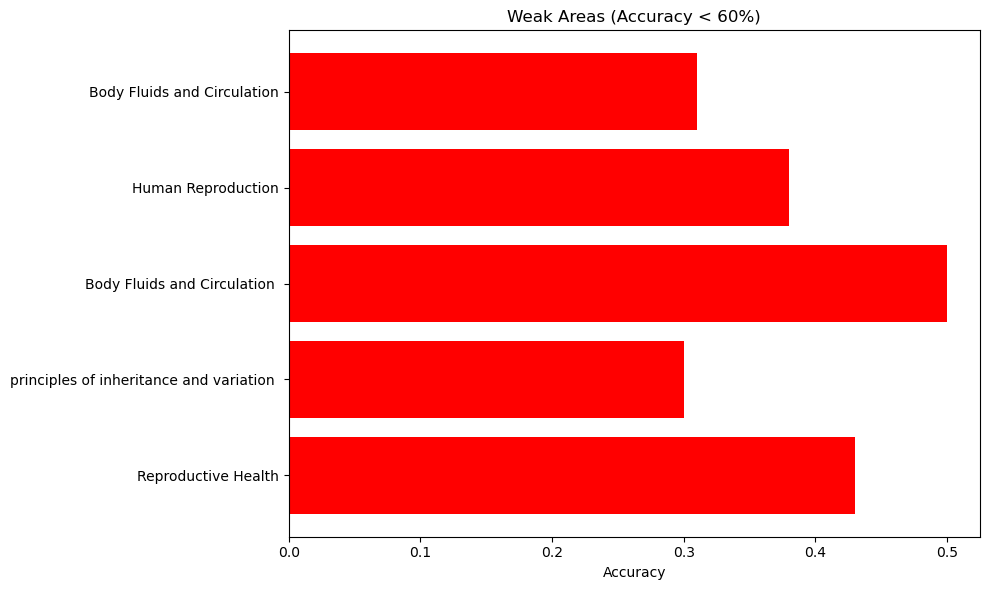

In [27]:
# Bar chart for weak areas (accuracy < 60%)
plt.figure(figsize=(10, 6))
plt.barh(weak_areas['quiz.topic'], weak_areas['accuracy'], color='red')
plt.xlabel('Accuracy')
plt.title('Weak Areas (Accuracy < 60%)')
plt.gca().invert_yaxis()  # To show the top topics at the top
plt.tight_layout()
plt.show()


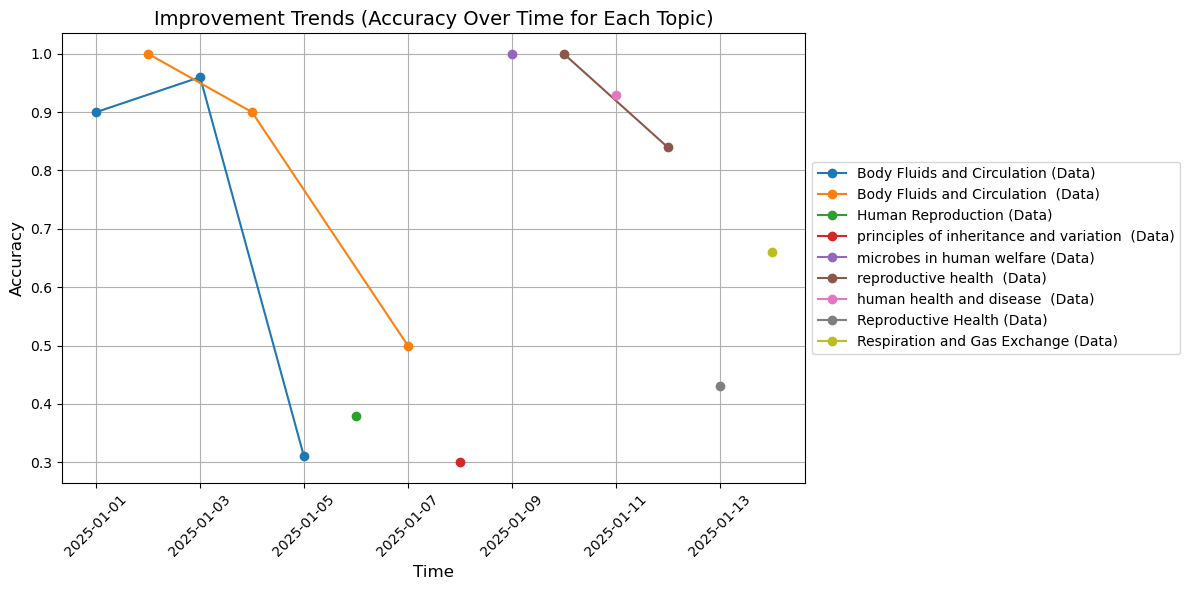

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential fitting function
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Ensure the 'quiz.time' column matches the length of the DataFrame
historical_df['quiz.time'] = pd.date_range(start='2025-01-01', periods=len(historical_df), freq='D')

# Prepare the plot
topics = historical_df['quiz.topic'].unique()
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through topics and plot accuracy trends
for topic in topics:
    topic_data = historical_df[historical_df['quiz.topic'] == topic].reset_index()
    x_data = np.arange(len(topic_data))
    y_data = topic_data['accuracy']

    if len(x_data) > 3:  # Perform curve fitting only if there are enough data points
        try:
            popt, _ = curve_fit(exp_func, x_data, y_data, p0=(1, 0.01, 1))

            # Plot the fitted exponential trend line
            ax.plot(topic_data['quiz.time'], exp_func(x_data, *popt), linestyle='--', label=f'{topic} (Fit)')
        except RuntimeError:
            print(f"Could not fit exponential curve for topic: {topic}")

    # Plot the actual accuracy data
    ax.plot(topic_data['quiz.time'], y_data, marker='o', label=f'{topic} (Data)')

# Adjust the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Improvement Trends (Accuracy Over Time for Each Topic)', fontsize=14)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


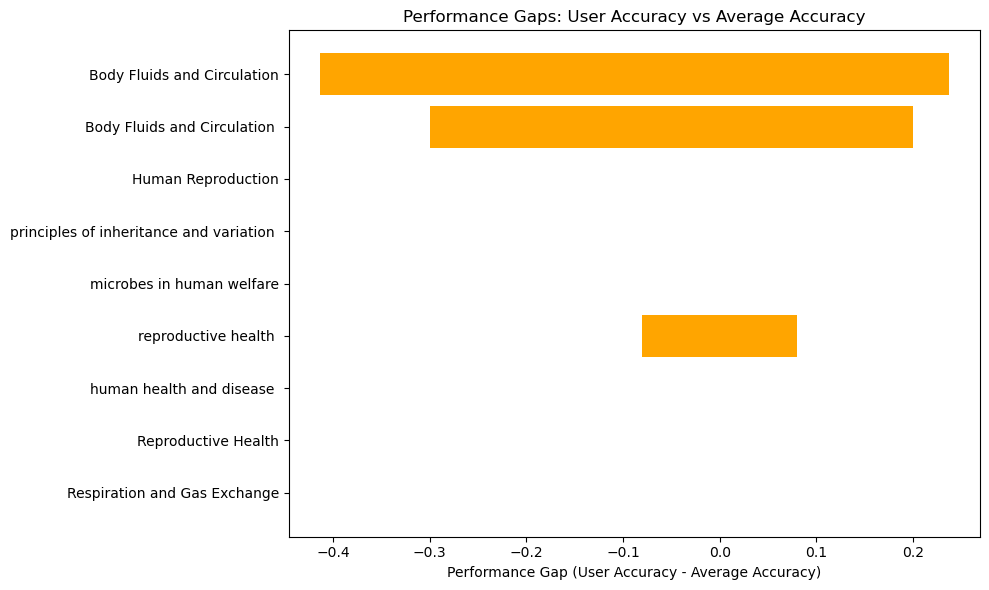

In [29]:
# Bar chart for performance gaps (user accuracy vs average accuracy)
plt.figure(figsize=(10, 6))
plt.barh(user_performance['quiz.topic'], user_performance['performance_gap'], color='orange')
plt.xlabel('Performance Gap (User Accuracy - Average Accuracy)')
plt.title('Performance Gaps: User Accuracy vs Average Accuracy')
plt.gca().invert_yaxis()  # To show the top gaps at the top
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14332\3593187247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = historical_df.groupby('quiz.topic').agg({
C:\Users\User\AppData\Local\Temp\ipykernel_14332\3593187247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accuracy', y='quiz.topic', data=df_sorted, palette='coolwarm')


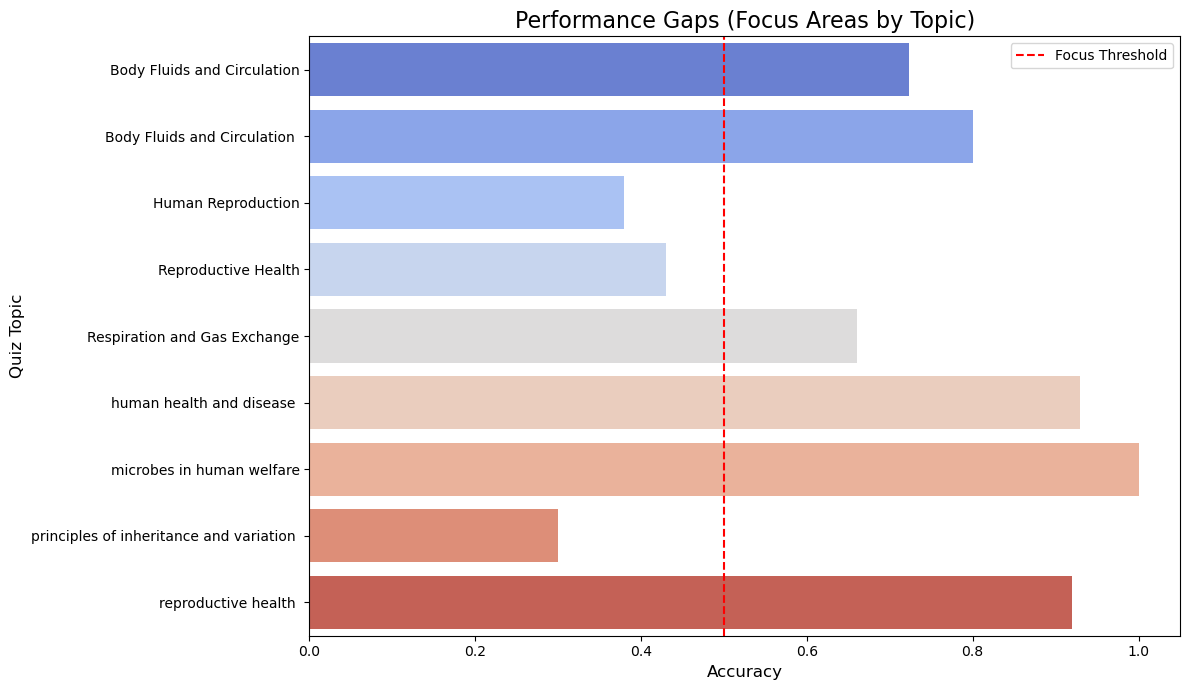

In [30]:
# Group by quiz.topic and calculate mean accuracy and total questions
df_grouped = historical_df.groupby('quiz.topic').agg({
    'accuracy': 'mean',
    'total_questions': 'sum'
}).reset_index()

# Sort by accuracy to easily identify weak and strong topics
df_sorted = df_grouped.sort_values(by='accuracy', ascending=True)

# Plot the bar chart to show topics with their accuracy
plt.figure(figsize=(12, 7))
sns.barplot(x='accuracy', y='quiz.topic', data=df_sorted, palette='coolwarm')

# Add a red dashed line at the 0.5 threshold (weak area)
plt.axvline(x=0.5, color='red', linestyle='--', label='Focus Threshold')

# Title and labels
plt.title('Performance Gaps (Focus Areas by Topic)', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Quiz Topic', fontsize=12)
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Task-3 Recommendations

C:\Users\User\AppData\Local\Temp\ipykernel_14332\2650604422.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_features = historical_df.groupby('quiz.topic')['accuracy'].mean().values.reshape(-1, 1)  # Using accuracy for simplicity


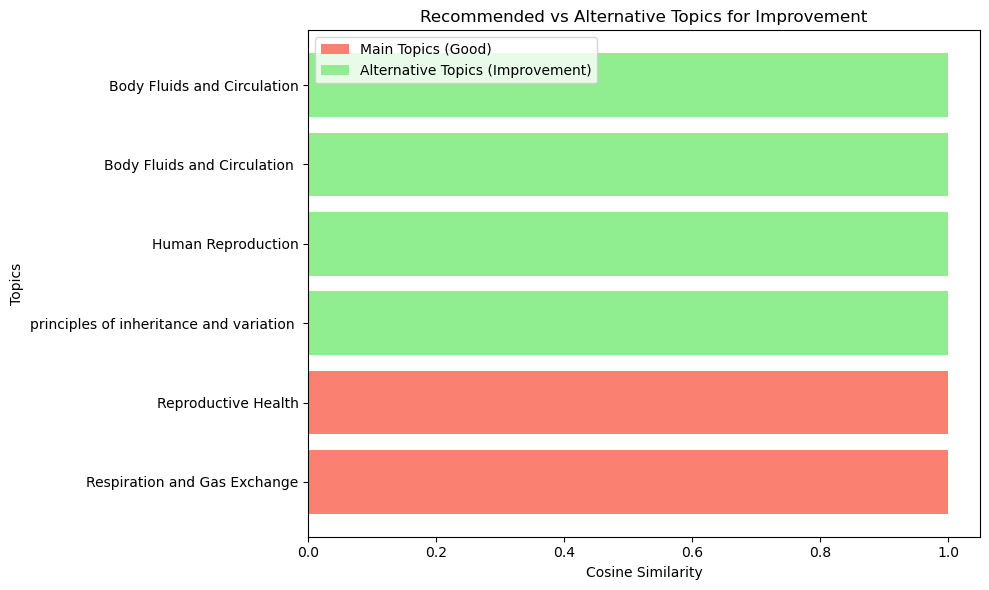

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example 'historical_df' DataFrame (replace with actual data)
topics = historical_df['quiz.topic'].unique()

# Let's create a simple feature matrix based on accuracy (you can add more features as needed)
topic_features = historical_df.groupby('quiz.topic')['accuracy'].mean().values.reshape(-1, 1)  # Using accuracy for simplicity

# Calculate cosine similarity between topics (similarity matrix)
cos_sim = cosine_similarity(topic_features)

# Example: Get cosine similarity for student 0 (or any other student)
student_index = 0
similarities = cos_sim[student_index]  # Cosine similarity of student 0 with all topics

# Sort topics by their cosine similarity
similar_topics_indices = np.argsort(similarities)[::-1]  # Sort by most similar (highest first)

# Identify top 3 similar topics (good topics) and the bottom 3 (focus areas)
main_topics = [topics[i] for i in similar_topics_indices[:2]]  # Top 3 most similar topics (good topics)
alternative_topics = [topics[i] for i in similar_topics_indices[-4:]]  # Bottom 3 (need more focus)

# Scores based on cosine similarity (higher is better)
main_scores = similarities[similar_topics_indices[:2]]
alt_scores = similarities[similar_topics_indices[-4:]]

# Bar Chart plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Main Topics (Good Topics - Higher Similarity)
ax.barh(main_topics, main_scores, color='salmon', label="Main Topics (Good)")

# Alternative Topics (Topics for Improvement - Lower Similarity)
ax.barh(alternative_topics, alt_scores, color='lightgreen', label="Alternative Topics (Improvement)")

# Labels and Title
ax.set_xlabel('Cosine Similarity')
ax.set_ylabel('Topics')
ax.set_title('Recommended vs Alternative Topics for Improvement')
ax.legend(loc='upper left')

# Display Chart
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14332\4158554194.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_performance = historical_df.groupby('quiz.topic')['accuracy'].mean()


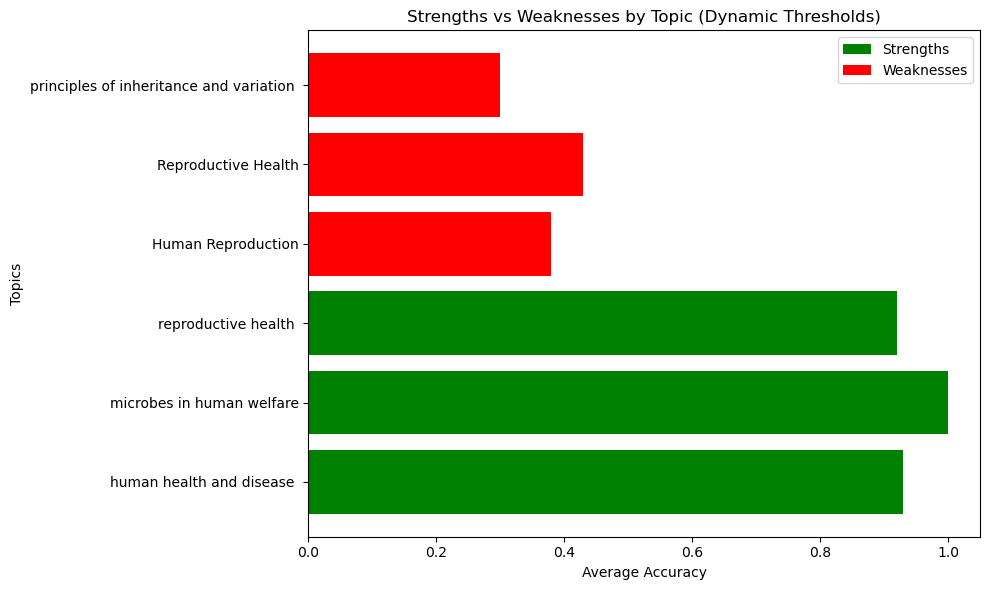

Strengths (High Performance):
- Topics: human health and disease , microbes in human welfare, reproductive health 
  Recommendation: Reinforce your knowledge in these topics. Continue practicing to maintain your high performance.

Weaknesses (Low Performance):
- Topics: Human Reproduction, Reproductive Health, principles of inheritance and variation 
  Recommendation: Focus on improving these topics. Consider reviewing the foundational concepts and doing extra practice.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentiles to define dynamic thresholds
high_threshold = historical_df['accuracy'].quantile(0.50)  # 50th percentile
low_threshold = historical_df['accuracy'].quantile(0.25)   # 25th percentile

# Calculate average accuracy per topic for all students
topic_performance = historical_df.groupby('quiz.topic')['accuracy'].mean()

# Categorize topics based on the calculated thresholds
high_performance_topics = topic_performance[topic_performance >= high_threshold]
low_performance_topics = topic_performance[topic_performance <= low_threshold]

# Plotting the performance of topics with dynamic thresholds
plt.figure(figsize=(10, 6))

# High-performing topics (green)
plt.barh(high_performance_topics.index, high_performance_topics, color='green', label='Strengths')

# Low-performing topics (red)
plt.barh(low_performance_topics.index, low_performance_topics, color='red', label='Weaknesses')

# Adding labels and title
plt.xlabel('Average Accuracy')
plt.ylabel('Topics')
plt.title('Strengths vs Weaknesses by Topic (Dynamic Thresholds)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Generate actionable insights with dynamic thresholds
def generate_insights_dynamic(topic_performance, high_threshold, low_threshold):
    # High-performing topics
    high_performers = topic_performance[topic_performance >= high_threshold]
    # Low-performing topics
    low_performers = topic_performance[topic_performance <= low_threshold]
    
    # Strengths and recommendations
    print("Strengths (High Performance):")
    if len(high_performers) > 0:
        print(f"- Topics: {', '.join(high_performers.index)}")
        print(f"  Recommendation: Reinforce your knowledge in these topics. Continue practicing to maintain your high performance.")
    else:
        print("No strong topics identified. Focus on improving various topics.")
    
    # Weaknesses and recommendations
    print("\nWeaknesses (Low Performance):")
    if len(low_performers) > 0:
        print(f"- Topics: {', '.join(low_performers.index)}")
        print(f"  Recommendation: Focus on improving these topics. Consider reviewing the foundational concepts and doing extra practice.")
    else:
        print("No weak topics identified. Keep up the great work!")

# Display actionable insights with dynamic thresholds
generate_insights_dynamic(topic_performance, high_threshold, low_threshold)



In [36]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.2 kB 656.4 kB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\User\AppData\Local\Temp\ipykernel_14332\3380799064.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_performance = historical_df.groupby('quiz.topic')['accuracy'].mean()


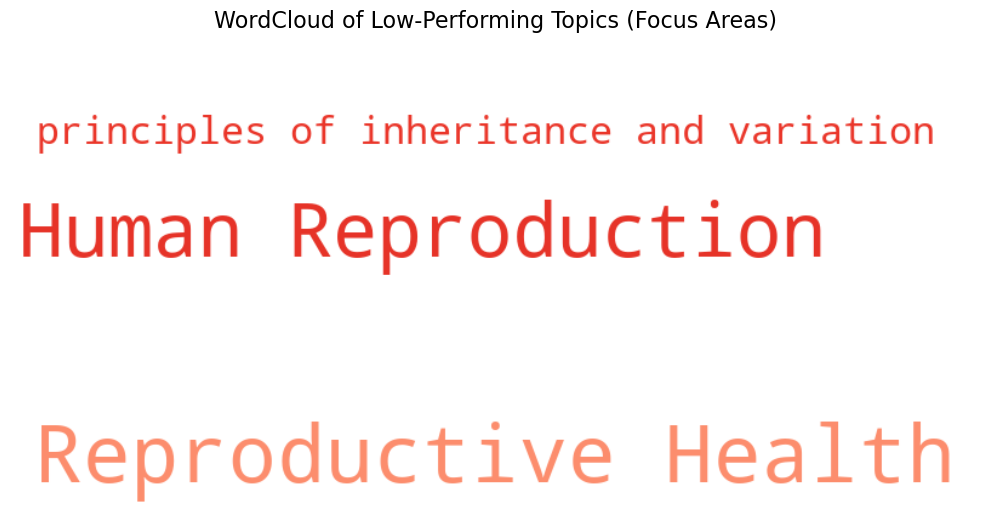

Strengths (High Performance):
- Topics: microbes in human welfare
  Recommendation: Reinforce your knowledge in these topics. Continue practicing to maintain your high performance.

Weaknesses (Low Performance):
- Topics: Human Reproduction, Reproductive Health, principles of inheritance and variation 
  Recommendation: Focus on improving these topics. Consider reviewing the foundational concepts and doing extra practice.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming historical_df is already loaded
# Calculate percentiles to define dynamic thresholds
high_threshold = historical_df['accuracy'].quantile(0.75)  # 75th percentile
low_threshold = historical_df['accuracy'].quantile(0.25)   # 25th percentile

# Calculate average accuracy per topic for all students
topic_performance = historical_df.groupby('quiz.topic')['accuracy'].mean()

# Categorize topics based on the calculated thresholds
high_performance_topics = topic_performance[topic_performance >= high_threshold]
low_performance_topics = topic_performance[topic_performance <= low_threshold]

# Prepare data for WordCloud (Low Performance Topics)
wordcloud_data = low_performance_topics.to_dict()  # Convert to dictionary (topic: accuracy)

# Generate a WordCloud based on low-performing topics
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(wordcloud_data)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('WordCloud of Low-Performing Topics (Focus Areas)', fontsize=16)
plt.tight_layout()
plt.show()

# Display actionable insights with dynamic thresholds
def generate_insights_dynamic(topic_performance, high_threshold, low_threshold):
    # High-performing topics
    high_performers = topic_performance[topic_performance >= high_threshold]
    # Low-performing topics
    low_performers = topic_performance[topic_performance <= low_threshold]
    
    # Strengths and recommendations
    print("Strengths (High Performance):")
    if len(high_performers) > 0:
        print(f"- Topics: {', '.join(high_performers.index)}")
        print(f"  Recommendation: Reinforce your knowledge in these topics. Continue practicing to maintain your high performance.")
    else:
        print("No strong topics identified. Focus on improving various topics.")
    
    # Weaknesses and recommendations
    print("\nWeaknesses (Low Performance):")
    if len(low_performers) > 0:
        print(f"- Topics: {', '.join(low_performers.index)}")
        print(f"  Recommendation: Focus on improving these topics. Consider reviewing the foundational concepts and doing extra practice.")
    else:
        print("No weak topics identified. Keep up the great work!")

# Display actionable insights with dynamic thresholds
generate_insights_dynamic(topic_performance, high_threshold, low_threshold)


In [40]:
pip install streamlit
